<a href="https://colab.research.google.com/github/Dilavarj7/Automated-Question-Answering-System--Team1---Capstone-Project/blob/main/Automated_Question_Answering_System_Team1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
We will solve the above-mentioned challenge by applying deep learning algorithms to textual data.
The solution to this problem can be obtained through Extractive Question Answering wherein we can
extract an answer from a text given the question.
###1.2.1 Topic Modelling
This is a theme extraction task on a collection of Data Science specific documents which can be done
via Latent Dirichlet Allocation (LDA). The topic model should identify the important themes of a
document and list down the top-N constituent words of the themes/topics.
###1.2.2 Extractive Question Answering
Extractive Question Answering is the task of extracting an answer from a text given a question. The
text would essentially be the group of documents that have the highest concentration of the topic
closest to the asked question.


## **1.2.2.1 Head-start References**
❖ https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAll
ocation.html
<br>❖ https://pyldavis.readthedocs.io/en/latest/readme.html
<br>❖ https://huggingface.co/transformers/usage.html#extractive-question-answering
###NOTE - The solution should not be limited to the above references; students are encouraged to read relevant research papers.
### 1.3 Scope of project
<br>A. The topic model should be able to identify/extract important topics.
<br>B. The topic model would be built on the corpus of Data Science documents.
<br>C. The topic model should yield the most relevant and stable topics measured through the
perplexity score.
<br>D. Once the relevant documents have been retrieved, the extractive question answering
<br>model would generate the answer for the question.
<br>E. The entire dual-model pipeline would be deployed in AWS/GCP/Azure
<br>F. The dual-model pipeline must be accessible via a web application(Streamlit) for demo
purpose.


## Word2Vec Implemenation Part:



# **Project Title : All The News**

---
### I wanted to see how articles clustered together if the articles were rendered into document-term matrices---would there be greater affinity among political affiliations, or medium, subject matter, etc. The data was scraped using BeautifulSoup and stored in Sqlite, but I've chopped it up into three separate CSVs here, because the entire Sqlite database came out to about 1.2 gb, beyond Kaggle's max.

###The publications include the New York Times, Breitbart, CNN, Business Insider, the Atlantic, Fox News, Talking Points Memo, Buzzfeed News, National Review, New York Post, the Guardian, NPR, Reuters, Vox, and the Washington Post. Sampling wasn't quite scientific; I chose publications based on my familiarity of the domain and tried to get a range of political alignments, as well as a mix of print and digital publications. By count, the publications break down accordingly:
###The data primarily falls between the years of 2016 and July 2017, although there is a not-insignificant number of articles from 2015, and a possibly insignificant number from before then.

## **Content**
### articles.csv - 50,000 news articles (Articles 1-50,000)




## **Important Library**

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
articles_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Document Profiling/dat/' + 'articles.csv')

In [ ]:
del articles_df['Unnamed: 0']
#As we can see we don't have any record for url feature so we can drop that colums
del articles_df['url']
#Handling Null Value
articles_df['author'] = articles_df['author'].fillna("")

In [ ]:
articles_df['content_length']=articles_df['content'].apply(len)
articles_df = articles_df[(articles_df['content_length'] > 2000) & (articles_df['content_length'] < 2500)]

In [ ]:
articles_df = articles_df.reset_index()
del articles_df['index']
articles_df.head(2)

,id,title,publication,author,date,year,month,content,content_length
0,17323,"Airline Pilot, Believed to Be Drunk, Is Pulled...",New York Times,Ian Austen,2017-01-03,2017.0,1.0,OTTAWA — It was 7 a. m. and 99 passengers a...,2482
1,17338,It’s Time to Ignore Advice About Which Stocks ...,New York Times,Damon Darlin,2017-01-09,2017.0,1.0,It’s that time of year when financial advice s...,2221


In [ ]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5559 non-null   int64  
 1   title           5559 non-null   object 
 2   publication     5559 non-null   object 
 3   author          5559 non-null   object 
 4   date            5559 non-null   object 
 5   year            5559 non-null   float64
 6   month           5559 non-null   float64
 7   content         5559 non-null   object 
 8   content_length  5559 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 391.0+ KB


In [ ]:
articles_df['content'][0]

'OTTAWA  —   It was 7 a. m. and 99 passengers and six crew members were aboard a 737 on the tarmac at Calgary International Airport, bound for a sunny holiday in Cancun, Mexico. There was one problem, however. The flight’s captain was passed out in the cockpit, apparently from drinking. The police in Calgary, Alberta, arrested the pilot, Miroslav Gronych, 37, on Saturday and have charged him with two   offenses. “This is a new one, and obviously this had a very significant potential to cause great harm had the pilot actually been allowed to fly this plane,” Staff Sgt. Paul Stacey of the Calgary Police Service said at a news conference. “There’s just so many checks and balances, it just doesn’t surprise me that he got caught before this plane was able to leave the gate. ” Nevertheless, Inspector Ken Thrower, the commander of the Calgary Police Service’s traffic and airport unit, said his officers, along with airport officials and inspectors from Transport Canada, the aviation regulator,

## **function which removes punctuation and stopwords from our data**

In [ ]:
# Functions for presprocessing data
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
articles_df['final_text'] = articles_df['content'].apply(text_process)

In [ ]:
articles_df['final_text'][0]

'OTTAWA — 7 99 passengers six crew members aboard 737 tarmac Calgary International Airport bound sunny holiday Cancun Mexico one problem however flight’s captain passed cockpit apparently drinking police Calgary Alberta arrested pilot Miroslav Gronych 37 Saturday charged two offenses “This new one obviously significant potential cause great harm pilot actually allowed fly plane” Staff Sgt Paul Stacey Calgary Police Service said news conference “There’s many checks balances doesn’t surprise got caught plane able leave gate ” Nevertheless Inspector Ken Thrower commander Calgary Police Service’s traffic airport unit said officers along airport officials inspectors Transport Canada aviation regulator begin trying figure pilot managed pass several checkpoints including airport security obviously inebriated Mr Gronych charged two criminal offenses care control aircraft impaired care control aircraft testing 80 milligrams alcohol per 100 milliliters blood “He pretty high” Sergeant Stacey said

# **Remove unwanted character**

In [ ]:
lst = ['’', '“','”',' — ']
def text_process1(msg):    
      msg = msg.replace(lst[0], '') 
      msg = msg.replace(lst[1], '')  
      msg = msg.replace(lst[2], '') 
      msg = msg.replace(lst[3], '') 
      return msg
#Function Calling
articles_df['final_text'] = articles_df['final_text'].apply(text_process1)

In [ ]:
articles_df['final_text'][0]

'OTTAWA7 99 passengers six crew members aboard 737 tarmac Calgary International Airport bound sunny holiday Cancun Mexico one problem however flights captain passed cockpit apparently drinking police Calgary Alberta arrested pilot Miroslav Gronych 37 Saturday charged two offenses This new one obviously significant potential cause great harm pilot actually allowed fly plane Staff Sgt Paul Stacey Calgary Police Service said news conference Theres many checks balances doesnt surprise got caught plane able leave gate  Nevertheless Inspector Ken Thrower commander Calgary Police Services traffic airport unit said officers along airport officials inspectors Transport Canada aviation regulator begin trying figure pilot managed pass several checkpoints including airport security obviously inebriated Mr Gronych charged two criminal offenses care control aircraft impaired care control aircraft testing 80 milligrams alcohol per 100 milliliters blood He pretty high Sergeant Stacey said adding incon

In [ ]:
import nltk
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## **Lemmatizer**

In [ ]:
def word_lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    lem_text = lemmatizer.lemmatize(text)
    return lem_text

articles_df['final_text'] = articles_df['final_text'].apply(word_lemmatizer)

NameError: ignored

In [ ]:
articles_df['final_text'][0]

'OTTAWA7 99 passengers six crew members aboard 737 tarmac Calgary International Airport bound sunny holiday Cancun Mexico one problem however flights captain passed cockpit apparently drinking police Calgary Alberta arrested pilot Miroslav Gronych 37 Saturday charged two offenses This new one obviously significant potential cause great harm pilot actually allowed fly plane Staff Sgt Paul Stacey Calgary Police Service said news conference Theres many checks balances doesnt surprise got caught plane able leave gate  Nevertheless Inspector Ken Thrower commander Calgary Police Services traffic airport unit said officers along airport officials inspectors Transport Canada aviation regulator begin trying figure pilot managed pass several checkpoints including airport security obviously inebriated Mr Gronych charged two criminal offenses care control aircraft impaired care control aircraft testing 80 milligrams alcohol per 100 milliliters blood He pretty high Sergeant Stacey said adding incon

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def token_text(text):
  token_text = nltk.word_tokenize(text)
  return token_text

articles_df['final_text'] = articles_df['final_text'].apply(token_text)

In [ ]:
text_lst = list(articles_df['final_text'])

In [ ]:
text_lst[:2]

In [ ]:
pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


##  **Genism word2vec Model Training**
### We can train the genism word2vec model with our own custom corpus as following:

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(text_lst, min_count=1,size= 100,workers=3, window =3, sg = 1)

INFO - 17:54:17: collecting all words and their counts
INFO - 17:54:17: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:54:18: collected 66975 word types from a corpus of 1206685 raw words and 5559 sentences
INFO - 17:54:18: Loading a fresh vocabulary
INFO - 17:54:18: effective_min_count=1 retains 66975 unique words (100% of original 66975, drops 0)
INFO - 17:54:18: effective_min_count=1 leaves 1206685 word corpus (100% of original 1206685, drops 0)
INFO - 17:54:18: deleting the raw counts dictionary of 66975 items
INFO - 17:54:18: sample=0.001 downsamples 7 most-common words
INFO - 17:54:18: downsampling leaves estimated 1192360 word corpus (98.8% of prior 1206685)
INFO - 17:54:19: estimated required memory for 66975 words and 100 dimensions: 87067500 bytes
INFO - 17:54:19: resetting layer weights
INFO - 17:54:32: training model with 3 workers on 66975 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=3
INFO - 17:54:33: EPOCH 1 - P

In [ ]:
model['International']

array([ 0.09590776,  0.4978551 , -0.09654199,  0.02307393,  0.19671842,
        0.22009912, -0.1320167 ,  0.05476198,  0.09487426,  0.23490928,
        0.03893372,  0.5334686 ,  0.13469453, -0.13136019, -0.23529159,
        0.23690389, -0.260326  ,  0.11296713, -0.6209226 ,  0.11032176,
       -0.46667993,  0.1298537 , -0.02849241,  0.30713814, -0.25627935,
        0.17045671, -0.00954488, -0.26876333,  0.19394001,  0.47309148,
       -0.13391952, -0.30251643, -0.43056673,  0.10412938, -0.385339  ,
       -0.3516228 , -0.49851793, -0.08667868, -0.33947444, -0.18749401,
        0.06414967,  0.00249913,  0.04558928, -0.13226691, -0.2663687 ,
       -0.06778715, -0.17371224, -0.26884678, -0.06747162, -0.459194  ,
       -0.2464387 , -0.34841245, -0.21581028, -0.09476356,  0.17104675,
       -0.01887847,  0.2622496 , -0.35705176, -0.7318792 ,  0.4352333 ,
        0.07594933, -0.2102076 ,  0.39338958,  0.10364138, -0.12804744,
       -0.11102927, -0.18253286,  0.30312583,  0.06132092,  0.26

## **Compute Similarities**

In [ ]:
model.similarity('aircraft', 'International')

0.53634036

In [ ]:
model.similarity('International', 'International')
#It should give 1.

1.0

## **Find 5 most simliar of a given word.**

In [ ]:
def similiar(word):
  sml = model.most_similar(word)
  return sml[:5]

In [ ]:
#International
similiar('International')

INFO - 17:55:24: precomputing L2-norms of word weight vectors


[('Regional', 0.8937653303146362),
 ('Studies', 0.8848621845245361),
 ('Space', 0.8843145966529846),
 ('Strategic', 0.8836016654968262),
 ('Science', 0.8799276351928711)]

In [ ]:
similiar('aircraft')

[('Iraqs', 0.9218901991844177),
 ('ships', 0.9160820245742798),
 ('missiles', 0.9160263538360596),
 ('Libyan', 0.9148445129394531),
 ('centres', 0.9146201014518738)]

In [ ]:
similiar('Mexico')

[('southern', 0.8388959169387817),
 ('Canada', 0.8291523456573486),
 ('border', 0.824154257774353),
 ('crossing', 0.8178645372390747),
 ('crossed', 0.7912918329238892)]

### However, Euclidian similarity cannot work well for the high-dimensional word vectors. This is because Euclidian similarity will increase as the number of dimensions increases, even if the word embedding stands for different meanings. Alternatively, we can use cosine similarity to measure the similarity between two vectors. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity captures the angle of the word vectors and not the magnitude. Under cosine similarity, no similarity is expressed as a 90-degree angle while the total similarity of 1 is at a 0-degree angle.

## **Cosine Similiarity**

---



In [ ]:
lst1=[]
for ele in text_lst:
  for i in ele:
    lst1.append(i)
lst1 = list(set(lst1))

In [ ]:
len(lst1)

66975

In [ ]:
def cosine_distance(model, word,target_list , num):
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [ ]:
## Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance(model,'aircraft',lst1,5)

[('Iraqs', 0.92189014),
 ('ships', 0.9160821),
 ('missiles', 0.91602635),
 ('Libyan', 0.91484433),
 ('centres', 0.91462016)]

## Here We are getting similiar word.....

## **T-SNE Visualizations for Gensim**

In [ ]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords,edgecolors='face',marker = 'o')

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

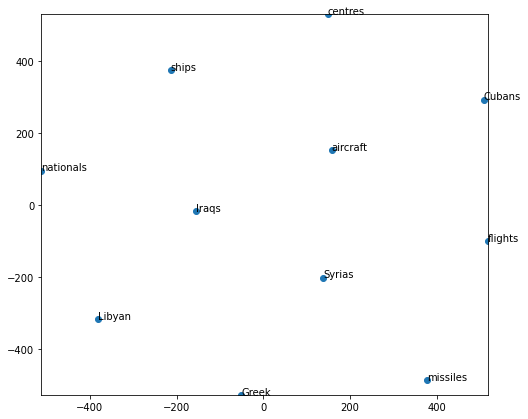

In [ ]:
plt.figure(figsize=(8,7))
display_closestwords_tsnescatterplot(model, 'aircraft', 100)